# Content
1. [Import dataSet](#1-Import-dataSet)
2. [Machine Learning](#2.-Machine-Learning)
    - [2.1 Splitting Train/Test Dataset](#2.1-Splitting-Train/Test-Dataset)
        - splitting feature(X),label(y) Data
        - splitting train/test data
        - standarizing the feature(X)
    - [2.2 Train a SVM Model](#2.2-Train-a-SVM-Model)
        - Fitting a model: SVC, y_pred
        - Checking overfitting: svmClf.score, accuracy_score
    - [2.3 Evaluation](#2.3-Evaluation)
        - accuracy_score
        - classification_report
        - confusion_matrix
3. [Comparasion](#3.-Comparasion)
    - [3.1 LazyClassifier](#-LazyClassifier)

## 1 Import dataSet

In [1]:
# !pip install ipynb
from ipynb.fs.full.o_svm_dataset import *

In [2]:
ds

,Red,Green,Blue,W1,Pot1,W2,Pot2,W3,Pot3,Fruit
0,107.0,82.0,63.0,0.0,76.0,0.0,76.0,0.0,76.0,0.0
1,106.0,82.0,63.0,11.5,77.0,32.5,77.0,26.0,77.0,0.0
2,108.0,80.0,62.0,0.0,80.5,0.0,80.5,0.0,80.5,0.0
3,108.0,81.0,63.0,0.0,75.5,0.0,75.5,7.5,75.5,0.0
4,109.0,80.0,62.0,1.0,78.0,15.5,78.0,0.0,78.0,0.0
...,...,...,...,...,...,...,...,...,...,...
77,108.0,78.0,64.0,70.0,210.0,47.5,210.0,59.0,210.0,5.0
78,111.0,76.0,64.0,219.0,276.0,126.0,276.0,46.0,276.0,5.0
79,111.0,77.0,63.0,127.5,168.5,87.5,168.5,52.5,168.5,5.0
80,111.0,78.0,63.0,176.5,256.5,121.0,256.5,71.0,256.5,5.0


## 2. Machine Learning

### 2.1 Splitting Train/Test Dataset
- splitting feature(X),label(y) Data

In [3]:
X = ds.drop('Fruit', axis=1)
y = ds['Fruit']
y = y.to_numpy(dtype='int')
print('Class labels:', np.unique(y))

Class labels: [0 1 2 3 4 5]


- splitting train/test data

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

- standarizing the feature(X)

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 2.2 Train a SVM Model

In [6]:
from sklearn import svm

svmClf = svm.SVC(C=1, kernel='linear', gamma='auto', random_state=1)
svmClf.fit(X_train_std, y_train)

SVC(C=1, gamma='auto', kernel='linear', random_state=1)

- checking SVM model if it is overfitting

In [7]:
from sklearn.metrics import accuracy_score

y_train_pred = svmClf.predict(X_train_std)
svm_train = accuracy_score(y_train, y_train_pred)

y_test_pred = svmClf.predict(X_test_std)
svm_test = accuracy_score(y_test, y_test_pred)

print('SVM Train Accuracy %.3f' % (svm_train))
print('SVM Test Accuracy %.3f' % (svm_test))

SVM Train Accuracy 0.920
SVM Test Accuracy 0.909


In [8]:
misclass = (y_test != y_test_pred).sum()
print('Misclassified examples: %d' % misclass)

Misclassified examples: 8


In [9]:
score_train = svmClf.score(X_train_std, y_train)
score_test = svmClf.score(X_test_std, y_test)
print('Accuracy: %.3f' % score_train)
print('Accuracy: %.3f' % score_test)

Accuracy: 0.920
Accuracy: 0.909


### 2.3 Evaluation

In [10]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        10
           2       0.81      0.93      0.86        27
           3       1.00      1.00      1.00         8
           4       0.87      0.68      0.76        19
           5       1.00      1.00      1.00        17

    accuracy                           0.91        88
   macro avg       0.95      0.94      0.94        88
weighted avg       0.91      0.91      0.91        88



Text(0.5, 1.0, 'Confusion matrix for our classifier')

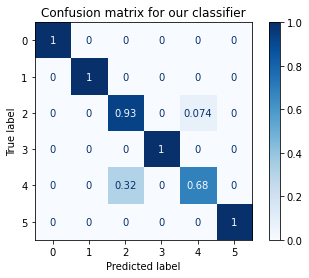

In [11]:
# ref: https://www.youtube.com/watch?v=zUqa6KcwRhs&list=WL&index=8&t=671s
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

matrix = plot_confusion_matrix(svmClf, X_test_std, y_test,
                               cmap=plt.cm.Blues, normalize='true')
plt.title('Confusion matrix for our classifier')
# plt.show(matrix)
# plt.show()

## 3. Comparasion

### 3.1 LazyClassifier

In [12]:
# !pip install lazypredict
# !pip install xgboost
# !pip install lightgbm

In [13]:
# conda install 'scikit-learn==0.23.2'
# LazyClassifier need version 'scikit-learn==0.23.2'

import lazypredict
from lazypredict.Supervised import LazyClassifier

/home/ash/anaconda3/envs/tensorflow1_14/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [14]:
# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
train,test = clf.fit(X_train_std, X_test_std, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 24.53it/s]


In [15]:
# Prints the model performance
train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelPropagation,0.98,0.99,None,0.98,0.03
LabelSpreading,0.98,0.99,None,0.98,0.03
ExtraTreesClassifier,0.98,0.98,None,0.98,0.10
KNeighborsClassifier,0.97,0.98,None,0.97,0.01
XGBClassifier,0.97,0.97,None,0.97,0.12
DecisionTreeClassifier,0.97,0.97,None,0.97,0.01
LGBMClassifier,0.95,0.97,None,0.95,0.28
BaggingClassifier,0.95,0.97,None,0.95,0.03
RandomForestClassifier,0.94,0.96,None,0.94,0.14


In [16]:
test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelPropagation,0.98,0.99,None,0.98,0.03
LabelSpreading,0.98,0.99,None,0.98,0.03
ExtraTreesClassifier,0.98,0.98,None,0.98,0.10
KNeighborsClassifier,0.97,0.98,None,0.97,0.01
XGBClassifier,0.97,0.97,None,0.97,0.12
DecisionTreeClassifier,0.97,0.97,None,0.97,0.01
LGBMClassifier,0.95,0.97,None,0.95,0.28
BaggingClassifier,0.95,0.97,None,0.95,0.03
RandomForestClassifier,0.94,0.96,None,0.94,0.14


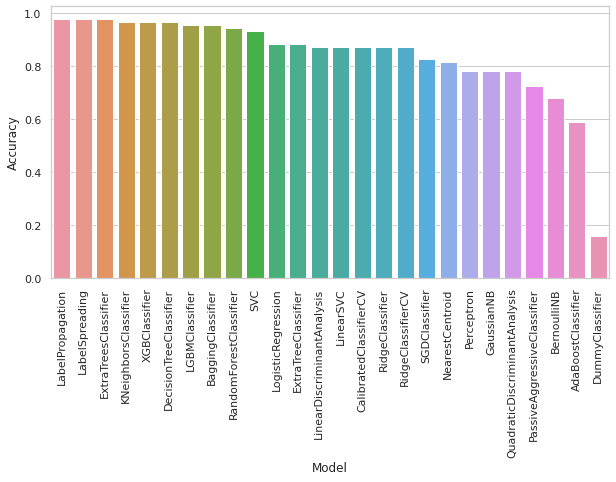

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
ax = sns.barplot(x=train.index, y="Accuracy", data=train)
plt.xticks(rotation=90)
plt.savefig('modelCompare.eps', dpi=300)

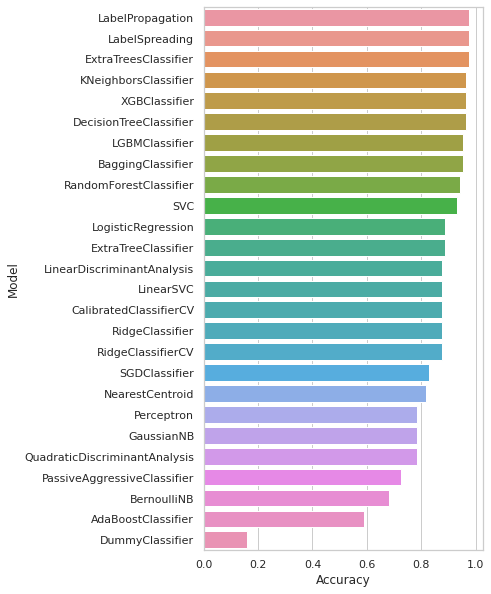

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set(style="whitegrid")
ax = sns.barplot(y=train.index, x="Accuracy", data=train)